In [1]:
import json
import os

In [34]:
results = {}
for context_length in [2**x for x in range(6, 30)]:
    for max_doc_length in [2**x for x in range(6, 30)]:
        path=f"/home/aiops/zhuty/eos_simulation/eos_token_distribution_cc_{context_length}_max{max_doc_length}_100per.json"
        if not os.path.exists(path):
            print(f"File {path} not found")
            continue

        results[(context_length, max_doc_length)] = json.load(open(path))


File /home/aiops/zhuty/eos_simulation/eos_token_distribution_cc_64_max67108864_100per.json not found
File /home/aiops/zhuty/eos_simulation/eos_token_distribution_cc_64_max134217728_100per.json not found
File /home/aiops/zhuty/eos_simulation/eos_token_distribution_cc_64_max268435456_100per.json not found
File /home/aiops/zhuty/eos_simulation/eos_token_distribution_cc_64_max536870912_100per.json not found


In [35]:
def calculate_percentage(result_dict):
    total = sum(result_dict.values())
    new_result = {k: v/total for k, v in result_dict.items()}
    return new_result

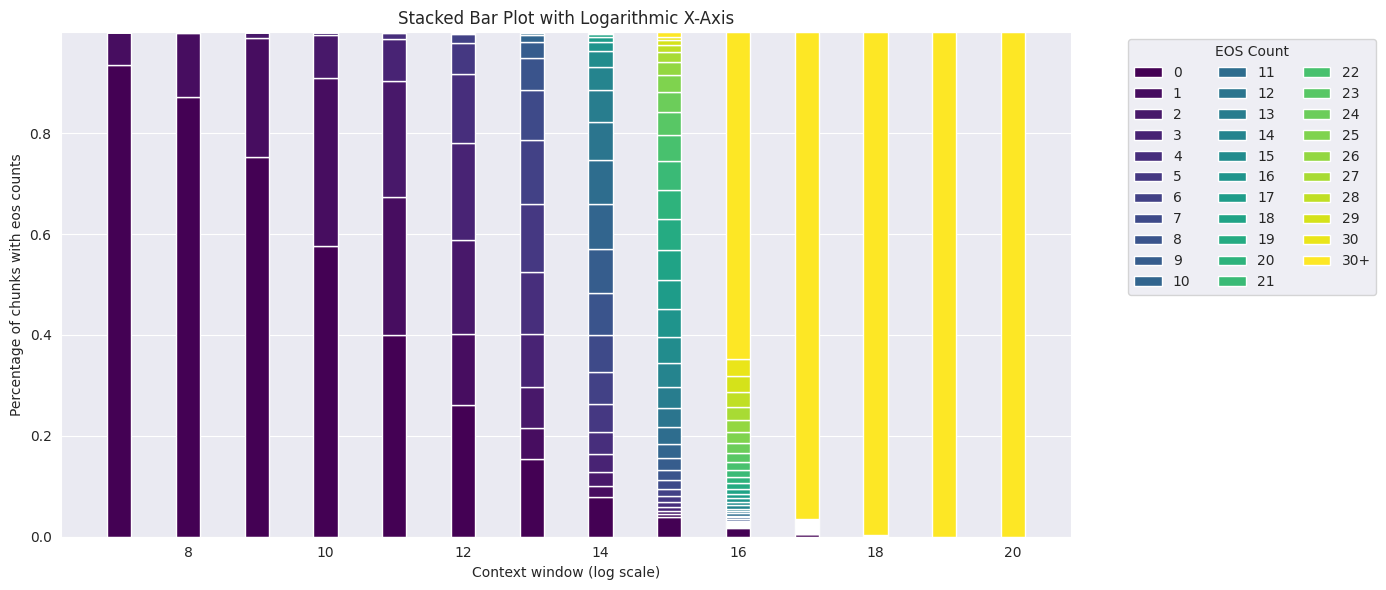

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the calculate_percentage function and results dictionary are defined elsewhere
max_doc_length = 67108864
# Example data
context_windows = [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576]

# Function to calculate percentages for EOS counts up to 30 and a group for larger counts
eos_percentages = []
for i in range(31):
    eos_percentages.append([calculate_percentage(results[(context_window, max_doc_length)]).get(str(i), 0) for context_window in context_windows])

# Group for EOS counts larger than 30
more_than_30_eos_percentages = [sum(calculate_percentage(results[(context_window, max_doc_length)]).get(str(i), 0) for i in range(31, 1000)) for context_window in context_windows]
eos_percentages.append(more_than_30_eos_percentages)

# Plotting the stacked bar plot
fig, ax = plt.subplots(figsize=(14, 6))

# Colors for the bars
colors = plt.cm.viridis(np.linspace(0, 1, 32))

# Data for stacked bar plot
labels = np.log2(context_windows)
width = 0.35  # Bar width

# Plot with logarithmic x-axis
bottoms = np.zeros(len(context_windows))
for i in range(32):  # Include the new group as the 32nd category
    ax.bar(labels, eos_percentages[i], width, bottom=bottoms, label=str(i) if i < 31 else '30+', color=colors[i])
    bottoms += eos_percentages[i]

ax.set_xlabel("Context window (log scale)")
ax.set_ylabel("Percentage of chunks with eos counts")
ax.set_title("Stacked Bar Plot with Logarithmic X-Axis")
ax.legend(ncol=3, title="EOS Count", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the calculate_percentage function and results dictionary are defined elsewhere
# Example context windows and a function to simulate results

context_windows = [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072]

# Simulating results
max_eos_count = 100000  # Example maximum EOS count for simulation
# def simulate_results():
#     return {i: np.random.rand() for i in range(max_eos_count+1)}
#
# results = {(context_window, max_doc_length): simulate_results() for context_window in context_windows}

def calculate_percentage(eos_counts):
    total = sum(eos_counts.values())
    return {k: v/total for k, v in eos_counts.items()}

# Calculate the percentages for each context window
percentages = [calculate_percentage(results[(context_window, max_doc_length)]) for context_window in context_windows]

# Create a list for each EOS count's percentages across all context windows
eos_counts = list(range(max_eos_count+1))
data = {eos_count: [percentage.get(eos_count, 0) for percentage in percentages] for eos_count in eos_counts}

# Colors for the bar segments
colors = plt.cm.viridis(np.linspace(0, 1, len(eos_counts)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot stacked bar plot with normal x-axis
bottom = np.zeros(len(context_windows))
for eos_count, color in zip(eos_counts, colors):
    ax1.bar(context_windows, data[eos_count], bottom=bottom, color=color, label=f"EOS count {eos_count}")
    bottom += data[eos_count]

ax1.set_xlabel("Context window")
ax1.set_ylabel("Percentage of chunks")
ax1.set_title("Normal X-Axis")
ax1.legend()

# Plot stacked bar plot with logarithmic x-axis
bottom = np.zeros(len(context_windows))
for eos_count, color in zip(eos_counts, colors):
    ax2.bar(context_windows, data[eos_count], bottom=bottom, color=color, label=f"EOS count {eos_count}")
    bottom += data[eos_count]

ax2.set_xscale('log')
ax2.set_xlabel("Context window (log scale)")
ax2.set_ylabel("Percentage of chunks")
ax2.set_title("Logarithmic X-Axis")
ax2.legend()

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f25b87d8160> (for post_execute):



KeyboardInterrupt



In [25]:
print(average_eos_counts)

[[4.24650000e+03 1.90438000e+05 2.38162800e+06 1.25222877e+07
  3.03706287e+07 4.61037810e+07 5.80961023e+07 6.84752220e+07
  7.52007230e+07 7.82000840e+07 8.01217047e+07]
 [2.81900000e+03 7.11375000e+04 8.89635500e+05 4.67752975e+06
  1.13444650e+07 1.72212860e+07 2.17007798e+07 2.55776882e+07
  2.80898648e+07 2.92102142e+07 2.99279950e+07]
 [1.40600000e+03 2.83998000e+04 3.55163000e+05 1.86736780e+06
  4.52893380e+06 8.59383300e+06 8.66335940e+06 1.27638610e+07
  1.12139936e+07 1.16612562e+07 1.19478068e+07]
 [5.26250000e+02 1.41860000e+04 1.77408800e+05 6.66267857e+05
  1.88521683e+06 2.86181733e+06 3.60621133e+06 4.25046833e+06
  4.66793683e+06 4.85411400e+06 4.97339350e+06]
 [2.09800000e+02 5.90733333e+03 6.33291429e+04 3.32971429e+05
  7.06611625e+05 1.07265825e+06 1.35166988e+06 1.59314812e+06
  1.74962212e+06 1.81940475e+06 1.86411262e+06]
 [7.42857143e+01 2.21437500e+03 2.46217778e+04 1.29457444e+05
  3.13972889e+05 3.89962182e+05 4.91396273e+05 5.30919833e+05
  6.36071000e+05

/home/aiops/zhuty/.conda/envs/synpre_env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/aiops/zhuty/.conda/envs/synpre_env/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


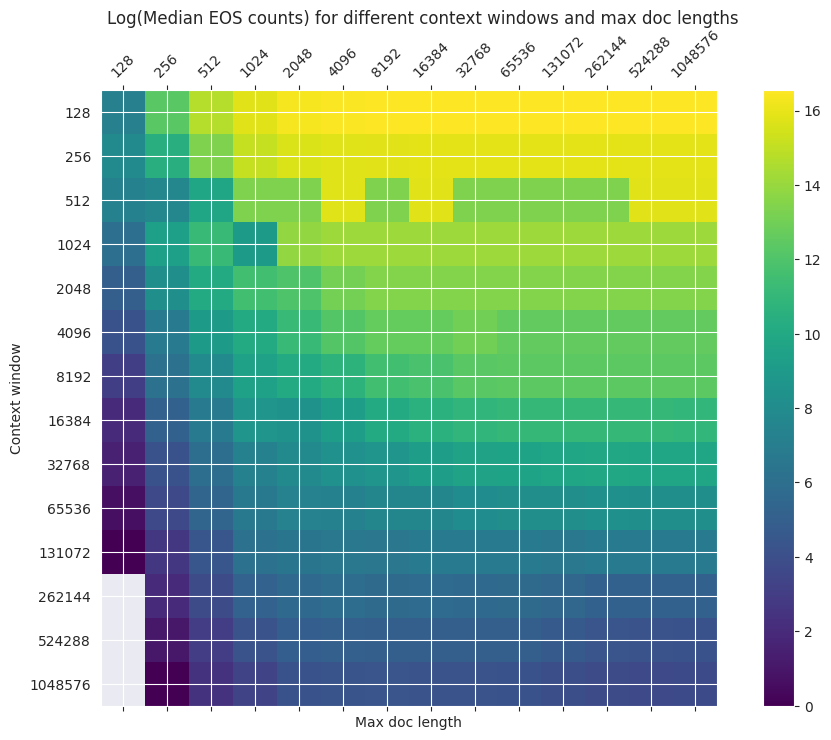

In [59]:
import matplotlib.pyplot as plt
import numpy as np

context_windows = [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576]
max_doc_lengths = [128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576]
num_context_windows = len(context_windows)
num_max_doc_lengths = len(max_doc_lengths)
# average_eos_counts = np.zeros((num_context_windows, num_max_doc_lengths))
# less_than_3 = np.zeros((num_context_windows, num_max_doc_lengths))
median_eos_counts = np.zeros((num_context_windows, num_max_doc_lengths))

# Assuming results is a dictionary that contains the data
# results = {(cw, mdl): np.random.rand(10) for cw in context_windows for mdl in max_doc_lengths}

for i, context_window in enumerate(context_windows):
    for j, max_doc_length in enumerate(max_doc_lengths):
        # average_eos_counts[i, j] = np.log(np.mean(list(results[(context_window, max_doc_length)].values())))
        # less_than_3[i,j] = sum([v for k, v in calculate_percentage(results[(context_window, max_doc_length)]).items() if int(k) < 1])
        median_eos_counts[i, j] = np.log( np.median(list(results[(context_window, max_doc_length)].values())))

fig, ax = plt.subplots(figsize=(12, 8))
# cax = ax.matshow(average_eos_counts, cmap='viridis')
cax = ax.matshow(median_eos_counts, cmap='viridis')
fig.colorbar(cax)
# fig.suptitle("Log(Average EOS counts) for different context windows and max doc lengths")
fig.suptitle("Log(Median EOS counts) for different context windows and max doc lengths")
# fig.suptitle("% of chunks with EOS counts==0 for different context windows and max doc lengths")
ax.set_xlabel("Max doc length")
ax.set_ylabel("Context window")

# Set the tick labels
ax.set_xticks(np.arange(num_max_doc_lengths))
ax.set_yticks(np.arange(num_context_windows))
ax.set_xticklabels(max_doc_lengths)
ax.set_yticklabels(context_windows)

# Rotate the tick labels for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()


In [5]:
results[(128, 128)]

{'1': 14295, '2': 2675, '0': 15, '3': 1}